## Twitter Sentiment Analysis

This project gives you an overview and a clear understanding of  how one can do the sentiment analysis in Social media platform posts. In this particular project, I have considered Twitter as one of the platform.

Prior to proceeding with this, you need to ensure certain pre-requisites to be fulfilled.

1) you need to install the tweepy,textblob packages assuming other defualt packages are available ( pandas, numpy,matplotlib,re etc)

 ex: pip install tweepy

2) Since you are going to connect to twitter platform from your project to access the live tweets, a develope account to be created in twitter and get the approval.

https://developer.twitter.com

3) Once the account is approved, you need to create an App using (Create an App) option in the website above. with this you need to secure the below 4 values.
        
    consumer_key
    consumer_secret
    token_key
    token_secret
    
 
Now you are good to go 


## Import all the required packages

In [14]:
import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import  StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assign the Twitter credentials

In [11]:
consumer_key='gjkCynA1WnH1g52tLyVKm0yDF'
consumer_secret='RapZtRGgkv39fSiUiX4dg7bgXjxpDKk39Lhi72b0IPL2zWrWp7'

token_key='166923335-NlTRMHSBLKwCoXj7UscmTe4rQRnKM5yDrYzNmumU'
token_secret='L6JMlt6hc1ROf70dd6eIN14w9R5LZbsonLUyfDjAuf0Vj'

## Authentication Class

This class will create and return the authentication object

In [2]:
class TwitterAuthenticate():
    def authenticate_Twitter(self):
        auth=OAuthHandler(consumer_key,consumer_secret)
        auth.set_access_token(token_key,token_secret)
        return auth
        

There are two ways you can get the tweets from the platform. One is the live tweets using streaming and other with API to get the existing tweets. First below will extend the StreamListener class and override the methods like on_data, on_error

This initialises the file where you need to write the JSON tweets and store them in you local computer for further analysis

In [4]:
class TweetListener(StreamListener):
    
    def __init__(self,filename):
        self.filename=filename
        
    def on_data(self,data):
        print(data)
        with open(self.filename,'a') as tf:
            tf.write(data)
        return True
    
    def on_error(self,status):
        print(staus)    

## Class for streaming and processing live tweets. we will create listener object and auth object and then start streaming

In [5]:
class TwitterStreamer():
    def __init__(self):
        self.authentication=TwitterAuthenticate()
       
    def stream_tweets(self,filename,hash_tag_list):
            
        listener=TweetListener(filename)
        auth=self.authentication.authenticate_Twitter()
        stream=Stream(auth,listener)  ## Main class to connect 
        
        stream.filter(track=hash_tag_list)
    

Lets create a streaming object and print/file write some JSON tweets  for a  specific hash tag and see what people are talking about

In [ ]:
local_path='E:/P/DataScience/ML/NLP/'
tweet_file=local_path+'tweets.txt'
has_tag_list=['realDonaldTrump','narendramodi']

twitterStreamer=TwitterStreamer()

twitterStreamer.stream_tweets(tweet_file,has_tag_list)

{"created_at":"Wed Mar 27 14:02:44 +0000 2019","id":1110904993010339840,"id_str":"1110904993010339840","text":"This is so wrong. #SpecialOlympics should continue to be funded. #Devos doesn't care. Do you? #TrumpBudget\u2026 https:\/\/t.co\/UXmu37KktI","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":805928605133971456,"id_str":"805928605133971456","name":"WomensMarchMO","screen_name":"WomensMarchMO","location":"Missouri, USA","url":"https:\/\/www.facebook.com\/WomensMarchMO","description":"We are Missourians who marched in Washington D.C. on January 21, 2017! Join our movement. #WomensMarchMO","translator_type":"none","protected":false,"verified":false,"followers_count":1320,"friends_count":858,"listed_count":17,"favourites_count":4289,"statuses_count":

{"created_at":"Wed Mar 27 14:02:45 +0000 2019","id":1110904995212193795,"id_str":"1110904995212193795","text":"RT @ZeeNews: 'Entire nation is proud:' PM #NarendraModi's message to scientists on #MissionShakti https:\/\/t.co\/9n02uEIzVU","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":374440873,"id_str":"374440873","name":"Mahi \ud83c\uddee\ud83c\uddf3\ud83c\uddee\ud83c\uddf3\ud83c\uddee\ud83c\uddf3","screen_name":"mahi_amin3","location":"Gujarat, India","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":256,"friends_count":131,"listed_count":1,"favourites_count":14340,"statuses_count":17886,"created_at":"Fri Sep 16 09:55:04 +0000 2011","utc_offset":null,"time_zone":null,"geo_


{"created_at":"Wed Mar 27 14:02:45 +0000 2019","id":1110904995942039557,"id_str":"1110904995942039557","text":"What a joke our legal system is!\n@DonaldJTrumpJr \n@realDonaldTrump \n@TomFitton","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3071012325,"id_str":"3071012325","name":"R.T.","screen_name":"randytau2014","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":238,"friends_count":433,"listed_count":0,"favourites_count":24187,"statuses_count":3783,"created_at":"Wed Mar 04 22:29:42 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"C0DEED","profile_b


{"created_at":"Wed Mar 27 14:02:45 +0000 2019","id":1110904996885725185,"id_str":"1110904996885725185","text":"@realDonaldTrump @FoxNews Then you won\u2019t mind if people #ReleaseTheFullReportNOW then?","display_text_range":[26,86],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1110714893039267840,"in_reply_to_status_id_str":"1110714893039267840","in_reply_to_user_id":25073877,"in_reply_to_user_id_str":"25073877","in_reply_to_screen_name":"realDonaldTrump","user":{"id":480914210,"id_str":"480914210","name":"Geez Louise","screen_name":"Geez_LouiseGuys","location":"California, USA","url":null,"description":"cool as a cucumber","translator_type":"none","protected":false,"verified":false,"followers_count":135,"friends_count":680,"listed_count":2,"favourites_count":13974,"statuses_count":9304,"created_at":"Thu Feb 02 02:24:14 +0000 2012","utc_offset":null,"time_zone":null,

{"created_at":"Wed Mar 27 14:02:45 +0000 2019","id":1110904997581971456,"id_str":"1110904997581971456","text":"@KamathVignesh93 @shivuvgowda @siddaramaiah @girishalva @swapnyk @sadasnk @AkshayVandure1 @sathi249 @kunthurukumar\u2026 https:\/\/t.co\/QRPJVLmidA","display_text_range":[117,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1110894216240984071,"in_reply_to_status_id_str":"1110894216240984071","in_reply_to_user_id":2983659456,"in_reply_to_user_id_str":"2983659456","in_reply_to_screen_name":"KamathVignesh93","user":{"id":279579775,"id_str":"279579775","name":"Chowkidar K Ramesh \ud83c\uddee\ud83c\uddf3\ud83d\ude4f","screen_name":"princekiran","location":"Singapore","url":null,"description":"An ex IT consultant, organic farming is the new job and passion, staunch believer in Sanatana dharma, lastly hardcore BJP man! RT not endorsements.","translator_type":"non


{"created_at":"Wed Mar 27 14:02:45 +0000 2019","id":1110904998525894668,"id_str":"1110904998525894668","text":"@realDonaldTrump @netanyahu @WhiteHouse THE NEW WORLD ORDER SATAN'S GOVERNMENT WILL BE DESTROYED IN ISRAEL WITH. TH\u2026 https:\/\/t.co\/I5npCDEhJ6","display_text_range":[40,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1110242521400123394,"in_reply_to_status_id_str":"1110242521400123394","in_reply_to_user_id":25073877,"in_reply_to_user_id_str":"25073877","in_reply_to_screen_name":"realDonaldTrump","user":{"id":4071529529,"id_str":"4071529529","name":"love of ALLAH","screen_name":"yaradanaski","location":null,"url":null,"description":"YARADAN ALLAH`A ASIK VE KUL","translator_type":"none","protected":false,"verified":false,"followers_count":661,"friends_count":3775,"listed_count":0,"favourites_count":1788,"statuses_count":20480,"created_at":"Fri Oct 30 00:40:42 +0000 

{"created_at":"Wed Mar 27 14:02:46 +0000 2019","id":1110905001130389505,"id_str":"1110905001130389505","text":"RT @visionindiaspl: Employment is the real test of any skilling initiative. Arpana skilled under #PMKK Hajipur is gainfully employed with M\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1093090098072084480,"id_str":"1093090098072084480","name":"ChowkidarRavindrabatholiya","screen_name":"ravindrabathol2","location":"Barwaha, India","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":26,"friends_count":55,"listed_count":0,"favourites_count":122,"statuses_count":427,"created_at":"Wed Feb 06 10:12:42 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","con

{"created_at":"Wed Mar 27 14:02:46 +0000 2019","id":1110905001839345665,"id_str":"1110905001839345665","text":"@dhruv_rathee @Ra_THORe @narendramodi Dear Neutral Observer, how does it even matter..!? Previous governments didn'\u2026 https:\/\/t.co\/kKuXSD7idU","display_text_range":[38,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1110897081835753472,"in_reply_to_status_id_str":"1110897081835753472","in_reply_to_user_id":730520573701443584,"in_reply_to_user_id_str":"730520573701443584","in_reply_to_screen_name":"dhruv_rathee","user":{"id":206071068,"id_str":"206071068","name":"Shashikumar","screen_name":"Shashikumarbs","location":null,"url":null,"description":"retweets are not endorsements & views expressed are personal.","translator_type":"none","protected":false,"verified":false,"followers_count":192,"friends_count":472,"listed_count":3,"favourites_count":2155,"

{"created_at":"Wed Mar 27 14:02:46 +0000 2019","id":1110905002711834627,"id_str":"1110905002711834627","text":"RT @akashbanerjee: I am starting a movement to ensure that @MajorPoonia is awarded the AVSM for distinguished service of an exceptional ord\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":87878742,"id_str":"87878742","name":"Satish Bhaker IITD","screen_name":"satbhaker","location":"New Delhi","url":"http:\/\/www.sun-photonics.com","description":"Director at Sun Photonics,Under the Sun,with the Sun","translator_type":"none","protected":false,"verified":false,"followers_count":231,"friends_count":446,"listed_count":0,"favourites_count":83,"statuses_count":962,"created_at":"Fri Nov 06 05:56:41 +0000 2009","utc_offset":

{"created_at":"Wed Mar 27 14:02:47 +0000 2019","id":1110905004162871296,"id_str":"1110905004162871296","text":"RT @narendramodi: Indeed, a proud moment for the whole nation.\n\nJust like you smash the bad deliveries out of the park, our scientists have\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":447676093,"id_str":"447676093","name":"kaushal Vinayak(\u092e\u0948\u0902 \u092d\u0940 \u091a\u094c\u0915\u0940\u0926\u093e\u0930)","screen_name":"KaushalVinayak","location":"Delhi","url":null,"description":"working with Interglobe technology. Inspired by #Narendramodi #Namosupporter #SwachhataHiSeva #NewIndia #MissionModi2019","translator_type":"none","protected":false,"verified":false,"followers_count":25,"friends_count":281,"l

{"created_at":"Wed Mar 27 14:02:47 +0000 2019","id":1110905004422922241,"id_str":"1110905004422922241","text":"RT @centerofright: India is still fighting for our seat at UNSC-Thanks to Nehru.India is still awaiting China\u2019s Approval to get into NSG-Th\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2949757284,"id_str":"2949757284","name":"Chowkidar - Patel","screen_name":"AkhaiP","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":898,"friends_count":766,"listed_count":51,"favourites_count":200184,"statuses_count":133807,"created_at":"Mon Dec 29 09:49:22 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enab

{"created_at":"Wed Mar 27 14:02:47 +0000 2019","id":1110905005865734145,"id_str":"1110905005865734145","text":"RT @abhisar_sharma: Major Poo\u0928\u093f\u092f\u093e , \u092e\u0948\u0902 \u091c\u093e\u0928\u0924\u093e \u0939\u0942\u0902 \u0924\u0941\u092e \u0905\u0935\u094d\u0935\u0932 \u0926\u0930\u094d\u091c\u0947 \u0915\u0947 \u0935\u093e\u0939\u093f\u092f\u093e\u0924 propagandist \u0925\u0947\u0964 \u092e\u0917\u0930 \u0915\u092e \u0938\u0947 \u0915\u092e \u0939\u0915\u093c\u0940\u0915\u093c\u0924 \u0924\u094b \u0926\u0947\u0916 \u0932\u094b\u0964 \u0905\u091a\u094d\u091b\u093e \u0939\u0941\u0906 \u0938\u0947\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":985625852128804864,"id_str":"985625852128804864","name":"Sukhi kha

{"created_at":"Wed Mar 27 14:02:48 +0000 2019","id":1110905007551873029,"id_str":"1110905007551873029","text":"RT @TajinderBagga: \u0928\u0947\u0939\u0930\u0942 \u091c\u0940 \u0915\u093e \u0938\u092a\u0928\u093e \u0925\u093e,\u0905\u0902\u0924\u0930\u093f\u0915\u094d\u0937 \u092e\u0947 \u092d\u093e\u0930\u0924 \u0915\u0940 \u0936\u0915\u094d\u0924\u093f \u0915\u094b \u092c\u0922\u093c\u093e\u0928\u093e,\u0932\u0947\u0915\u093f\u0928 \u0909\u0928\u0915\u0947 \u0907\u0938 \u0938\u092a\u0928\u0947 \u0915\u094b \u0909\u0928\u0915\u0940 \u092a\u0940\u0922\u093c\u0940 \u092e\u0947\u0902 \u0915\u094b\u0908 \u092a\u0942\u0930\u093e \u0928\u0939\u0940 \u0915\u0930 \u092a\u093e\u092f\u093e\u0964\u0906\u091c \u092e\u094b\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_

{"created_at":"Wed Mar 27 14:02:48 +0000 2019","id":1110905008713719809,"id_str":"1110905008713719809","text":"RT @Prof_Hariom: Dear Hindus\nGive 400 seats to @narendramodi .\n6 reasons\n\n1. Mar 27, 2019\nSuccessful Testing of an anti-satellite missile;\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4793935891,"id_str":"4793935891","name":"\u091a\u094c\u0915\u0940\u0926\u093e\u0930 Chandan","screen_name":"Chandankrishn13","location":"New Delhi, India","url":null,"description":"Political Analyst & Political Commentator ...!!","translator_type":"none","protected":false,"verified":false,"followers_count":342,"friends_count":503,"listed_count":8,"favourites_count":45982,"statuses_count":49879,"created_at":"Thu Jan 21 16:09:20 


{"created_at":"Wed Mar 27 14:02:48 +0000 2019","id":1110905009749688320,"id_str":"1110905009749688320","text":"RT @thatsTamil: 7 \u0bb5\u0bb0\u0bc1\u0b9f\u0ba4\u0bcd\u0ba4\u0bbf\u0bb1\u0bcd\u0b95\u0bc1 \u0bae\u0bc1\u0ba9\u0bcd\u0baa\u0bc7 \u0bb5\u0ba8\u0bcd\u0ba4 \u0ba4\u0bbf\u0b9f\u0bcd\u0b9f\u0bae\u0bcd.. \u0baa\u0bc1\u0ba4\u0bbf\u0ba4\u0bc1 \u0baa\u0bcb\u0bb2 \u0b85\u0bb1\u0bbf\u0bb5\u0bbf\u0ba4\u0bcd\u0ba4 \u0bae\u0bcb\u0b9f\u0bbf.. \u0bae\u0bbf\u0bb7\u0ba9\u0bcd \u0b9a\u0b95\u0bcd\u0ba4\u0bbf\u0baf\u0bbf\u0ba9\u0bcd \u0ba4\u0bbf\u0b9f\u0bc1\u0b95\u0bcd\u0b95\u0bbf\u0b9f\u0bc1\u0bae\u0bcd \u0b89\u0ba3\u0bcd\u0bae\u0bc8!  https:\/\/t.co\/EnQLWhZlF\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":899297441551450112,"id_str

{"created_at":"Wed Mar 27 14:02:48 +0000 2019","id":1110905011347689472,"id_str":"1110905011347689472","text":"RT @MajorPoonia: Ahmed Sahab,The same UPA Govt &amp; the so called visionary leadership of Dr Manmohan Singh didn\u2019t give approval to Indian Air\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":347113489,"id_str":"347113489","name":"Chowkidar  Ajay Kr Rathi","screen_name":"rathi_ajay","location":"Kolkata","url":null,"description":"I am a Proud Indian & Hindu. I am a dreamer & struggler. I like to travel & enjoy adventure,  I love my Guruji (Sri Sri Ravishankar) & Our PM, Sri Narendra Modi","translator_type":"none","protected":false,"verified":false,"followers_count":298,"friends_count":383,"listed_count":50,"favo

{"created_at":"Wed Mar 27 14:02:49 +0000 2019","id":1110905012731801600,"id_str":"1110905012731801600","text":"RT @BillKristol: \"We will call out every single solitary liar, con artist, who actively promoted a hoax, conspiracy theories, many for pers\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":17788057,"id_str":"17788057","name":"SalvadorL","screen_name":"SalvadorL","location":"Ridgefield, WA","url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":187,"friends_count":361,"listed_count":11,"favourites_count":30601,"statuses_count":20146,"created_at":"Mon Dec 01 20:23:46 +0000 2008","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":f

For both the hash tags Modi and Trump , more than 15 tweets have been tweeted as you see
sample tweet , text contains the actual tweet. These tweets are written to the file in JSON format. 

created_at":"Wed Mar 27 14:02:44 +0000 2019","id":1110904994058792961,"id_str":"1110904994058792961","text":"RT @narendramodi: Full credit to our scientists who succeeded in making India a part of an elite group of countries who have ASAT missile



Below, we will see how we can convert the tweets to a Pandas Data Frame to analyse the sentiment

## Get Timeline Tweets using API and Cursor class

Now we will get time line tweets of a specific user as below

In [8]:
class TwitterClient():
    def __init__(self,Twitter_user=None):
        self.auth=TwitterAuthenticate().authenticate_Twitter()
        self.twitter_client=API(self.auth)
        self.twitter_user=Twitter_user
        
    def getTwitterClient(self):
        return self.twitter_client
    
    def getUserTimelineTweet(self,num_tweets):
        tweets=[]
        for tweet in Cursor(self.twitter_client.user_timeline,id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
            return tweets
        
    def getHomeTimelineTweets(self,no_tweets):
        hometimelinetweets=[]
        for tweet in Cursor(self.twitter_client.home_timeline).items(no_tweets):
            hometimelinetweets.append(tweet)
            return hometimelinetweets

## Tweet Analyser 
# Lets analyse the home timeline tweets 

We will create a  class that contains a method to convert the Tweets JSON to a Pandas Data Frame and do some clean up activity of tweets and find out the sentiment of the tweets using TextBlob

We will take some of the data from the tweets. you can use #print(dir(tweets[0]) to get other attributes 

In [15]:
class TweetAnalyzer():
    
    def __init__(self):
        pass
    
    def tweets_to_dataframe(self,tweets):
        df=pd.DataFrame(data=[tweet.text for tweet in tweets] ,columns=['Tweet'])
        df['source']=np.array([tweet.source for tweet in tweets])
        df['Date']=np.array([tweet.created_at for tweet in tweets])
        df['likes'] =np.array([tweet.favorite_count for tweet in tweets])
        df['retweet_count']=np.array([tweet.retweet_count for tweet in tweets])
        df['length']=np.array([len(tweet.text) for tweet in tweets])
        
        return df
    
    ## Clean up activity 
    
    def clean_tweet(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    
    def analyze_sentiment(self,tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity>0:
            return 1
        elif analysis.sentiment.polarity==0:
            return 0
        else:
            return -1
    
 
        

There are other clean up activities of the tweets like stemming, lemetization, tokenization etc.. which i am not covering here.

## Creata an Object to the above class

In [12]:
twitterClient=TwitterClient()
api=twitterClient.getTwitterClient()    ## Please note that in this case if you do not specify it takes default
                                        ## your timeline tweets
                                        ## we will get 200 tweets to analyse

tweets=api.user_timeline(screen_name='narendramodi',count=200)  # user_timeline is a function in the tweepy package, 
                                                                # we didnt create it

#print(tweets)
#print(dir(tweets[0]))

tweetAnalyzer=TweetAnalyzer()
df=tweetAnalyzer.tweets_to_dataframe(tweets)
df.head()

,Tweet,source,Date,likes,retweet_count,length
0,Indeed Pranab Da. \n\nThese rich words from a ...,Twitter Web Client,2019-03-27 11:20:17,17670,4584,140
1,"Indeed, a proud moment for the whole nation.\n...",Twitter Web Client,2019-03-27 11:18:20,17604,4269,140
2,Full credit to our scientists who succeeded in...,Twitter Web Client,2019-03-27 11:15:53,17047,4736,140
3,"Kiran ji, India's indefatigable scientists con...",Twitter Web Client,2019-03-27 11:15:04,10582,2550,140
4,"आदरणीय लता दीदी, हमारे वैज्ञानिक पूरे विश्व मे...",Twitter Web Client,2019-03-27 11:14:31,28605,6727,140


## Lets find out the sentiment using the TextBlob

In [16]:
df['sentiment']=df['Tweet'].apply(lambda x:tweetAnalyzer.analyze_sentiment(x))

In [20]:
df.head(50)

,Tweet,source,Date,likes,retweet_count,length,sentiment
0,Indeed Pranab Da. \n\nThese rich words from a ...,Twitter Web Client,2019-03-27 11:20:17,17670,4584,140,1
1,"Indeed, a proud moment for the whole nation.\n...",Twitter Web Client,2019-03-27 11:18:20,17604,4269,140,1
2,Full credit to our scientists who succeeded in...,Twitter Web Client,2019-03-27 11:15:53,17047,4736,140,1
3,"Kiran ji, India's indefatigable scientists con...",Twitter Web Client,2019-03-27 11:15:04,10582,2550,140,0
4,"आदरणीय लता दीदी, हमारे वैज्ञानिक पूरे विश्व मे...",Twitter Web Client,2019-03-27 11:14:31,28605,6727,140,0
5,#MissionShakti is special for 2 reasons:\n(1) ...,Twitter Web Client,2019-03-27 07:11:27,88987,28301,144,1
6,"#MissionShakti was a highly complex one, condu...",Twitter Web Client,2019-03-27 07:09:53,42266,12697,139,1
7,In the journey of every nation there are momen...,Twitter Web Client,2019-03-27 07:08:59,59882,19319,139,0
8,An important message to the nation. Watch. htt...,Periscope,2019-03-27 06:54:29,37763,14929,66,1
9,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4...",Twitter Web Client,2019-03-27 05:53:17,103668,29571,140,0


As we can see majority of the tweets are possitive(1) and some are neturtal(0) and some are negative.(-1)

## Lets analyse the tweets using graphs

We will create a series and draw some time series of the Tweets to find some insights

[]

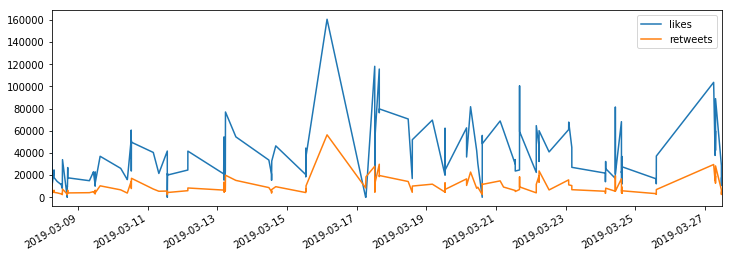

In [21]:

like_series=pd.Series(data=df['likes'].values,index=df['Date'].values)
retweet_series=pd.Series(data=df['retweet_count'].values,index=df['Date'].values)

like_series.plot(figsize=(12,4),label='likes',legend=True)
retweet_series.plot(figsize=(12,4),label='retweets',legend=True)
plt.plot()



If we observe the above graph , there are huge likes/retweets  around 17th of March and again on 27 also there are good number of likes. ( on this day it was annouced about a succesful launch of Shooting Down Missile" . This can be seen by the below tweet on this date



In [25]:
df.head(10)

,Tweet,source,Date,likes,retweet_count,length,sentiment
0,Indeed Pranab Da. \n\nThese rich words from a ...,Twitter Web Client,2019-03-27 11:20:17,17670,4584,140,1
1,"Indeed, a proud moment for the whole nation.\n...",Twitter Web Client,2019-03-27 11:18:20,17604,4269,140,1
2,Full credit to our scientists who succeeded in...,Twitter Web Client,2019-03-27 11:15:53,17047,4736,140,1
3,"Kiran ji, India's indefatigable scientists con...",Twitter Web Client,2019-03-27 11:15:04,10582,2550,140,0
4,"आदरणीय लता दीदी, हमारे वैज्ञानिक पूरे विश्व मे...",Twitter Web Client,2019-03-27 11:14:31,28605,6727,140,0
5,#MissionShakti is special for 2 reasons:\n(1) ...,Twitter Web Client,2019-03-27 07:11:27,88987,28301,144,1
6,"#MissionShakti was a highly complex one, condu...",Twitter Web Client,2019-03-27 07:09:53,42266,12697,139,1
7,In the journey of every nation there are momen...,Twitter Web Client,2019-03-27 07:08:59,59882,19319,139,0
8,An important message to the nation. Watch. htt...,Periscope,2019-03-27 06:54:29,37763,14929,66,1
9,"मेरे प्यारे देशवासियों, \n\nआज सवेरे लगभग 11.4...",Twitter Web Client,2019-03-27 05:53:17,103668,29571,140,0


 I hope this will help you to get an bird eye view of how we can perform the sentiment analysis using twitter